In [1]:
from ImmoKaa.ImmoKaa import ImmoKaa

In [2]:
#initialize ImmoKaa. It takes a name and the criteria yaml file.
ik = ImmoKaa("my_search", "./criteria.yaml")

In [4]:
ik.set_verbose(False)

In [5]:
ik.scrape()

city: Aarau
	page: 1/2 (24 results)
	page: 2/2 (6 results)


In [6]:
ik.get_full_dataset().head()

,id,accountId,agency,availableFrom,availableFromFormatted,cityId,cityName,commuteTimes,countryId,geoAccuracy,...,sortalgoScore,sortalgoScore2,listingCompletenessScore,sortingPosition,companyId,memberPackageId,surfaceProperty,surfacePropertyFormatted,searched-city,fetch-date
0,6514232,1005028,"{'companyCity': 'Schönenwerd', 'companyName1':...",2021-05-18T00:00:00+02:00,Immediately,3437,Suhr,"{'defaultPois': [{'defaultPoiId': 13, 'label':...",1,8,...,4.8285,4.8285,8.5,1,NaN,NaN,NaN,NaN,Aarau,2021-06-07
1,6507508,51062,"{'companyCity': 'Suhr', 'companyName1': 'Kelle...",NaN,Auf Anfrage,1056,Erlinsbach,"{'defaultPois': [{'defaultPoiId': 13, 'label':...",1,8,...,7.3260,7.3260,7.5,2,23766.0,3.0,NaN,NaN,Aarau,2021-06-07
2,6536501,778914,"{'companyCity': 'Aarau', 'companyName1': 'BCG ...",NaN,Auf Anfrage,1057,Erlinsbach SO,"{'defaultPois': [{'defaultPoiId': 13, 'label':...",1,8,...,7.1595,7.1595,7.5,3,8397.0,2.0,939.0,939 m²,Aarau,2021-06-07
3,6512453,285354,"{'companyCity': 'Aarau', 'companyName1': 'Prim...",2020-09-04T00:00:00+02:00,Sofort,2944,Rombach,"{'defaultPois': [{'defaultPoiId': 13, 'label':...",1,8,...,7.1595,7.1595,7.0,4,11943.0,3.0,NaN,NaN,Aarau,2021-06-07
4,6527150,14525,"{'companyCity': 'Frick', 'companyName1': 'RE/M...",NaN,Auf Anfrage,1781,Küttigen,"{'defaultPois': [{'defaultPoiId': 13, 'label':...",1,2,...,6.9930,6.9930,5.5,5,24799.0,3.0,NaN,NaN,Aarau,2021-06-07


In [7]:
ik.save_scraped_dataframe()

History file created/overwritten.


<AxesSubplot:>

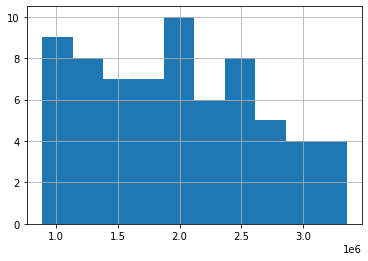

In [140]:
df["sellingPrice"].hist()

In [141]:
#data_all_cities.surfaceLiving[data_all_cities.surfaceLiving==0] = None
df['CHF/m2'] = df.price / df.surfaceLiving

<AxesSubplot:>

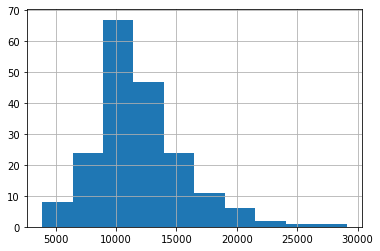

In [142]:
df['CHF/m2'].hist()

In [147]:
df_evolution = df.groupby("fetch-date").agg("mean")

<AxesSubplot:xlabel='fetch-date'>

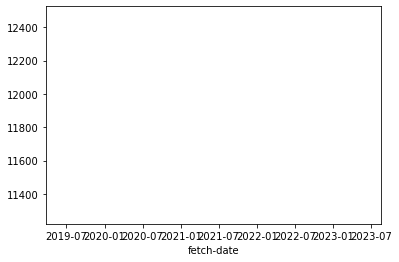

In [151]:
df_evolution['CHF/m2'].plot()

<AxesSubplot:xlabel='fetch-date'>

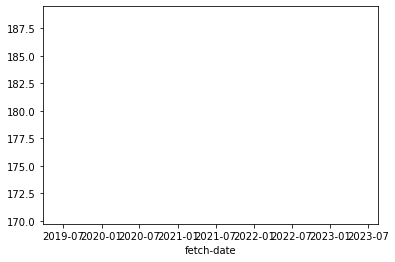

In [153]:
df_evolution['surfaceLiving'].plot()